# Problem Set 2

### 1. Measures, Values, and relationships

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
states = pd.read_csv("../Data/states.csv.bz2", sep = "\t")
states.head()

,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area
0,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,365,6315,1.5,69.31,11.3,66.7,152,566432
2,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,21198,5114,1.1,71.71,10.3,62.6,20,156361


#### 1.
- **Population**: Ratio measurement, as 0 population is meaningful, and would mean the absence of a population.
- **Income**: Ratio measurement, as 0 income is meaningful, and would mean no income.
- **Illiteracy**: Ratio measurement, as 0 percent illiteracy is meaningful.
- **Life Expectancy**: Ratio measurement, as 0 life expectancy is meaningful.
- **Murder**: Ratio measurement, since it is a rate, 0 has meaning, same goes for all rates.
- **HS Grad**: Ratio, once again it's a rate, and a percent of 0 HS graduates has meaning.
- **Frost**: Ratio because 0 has meaning, in this case, 0 avg. days with a temp. below freezing.
- **Area**: Ratio because 0 would mean 0 miles ^2 in this case.

#### 2.
- **Population**: This would be 

#### 3.
All of the data seems to fall correctly within the ranges that I specified. Doesn't seem to be any invalid values here.

#### 4.
Yes, HS graduation and income are both valid variables to answer questions regarding the relationship between the two. Ratio's are divideable. 

#### 5.
I think that the higher the HS graduation rate is, the higher the state's income will be. Since high school teaches you basic and fundamental skills for life both professionally and for further education, I think that the states with a higher percentage of high school graduates will have higher avg. incomes.

#### 6.

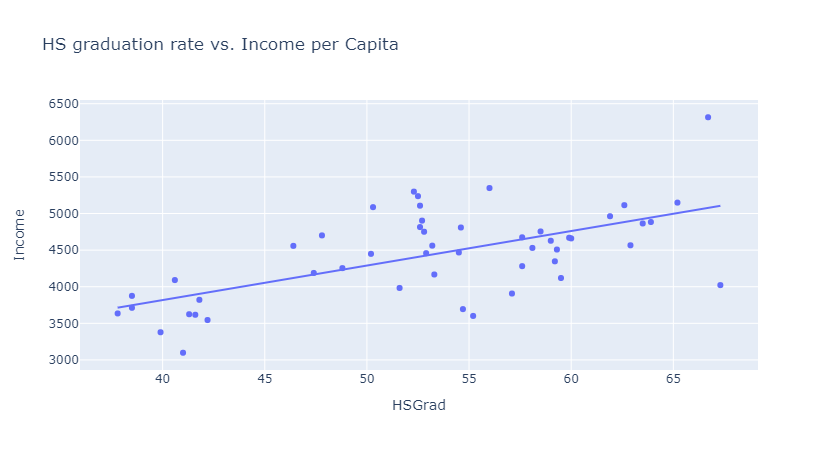

In [142]:
px.scatter(states, x = 'HSGrad', y = 'Income', trendline="ols", title = 'HS graduation rate vs. Income per Capita')

My idea seems to conform to what the graph and the line of best fit is showing. 

#### 7.

In [143]:
HS_med = states['HSGrad'].median() # calculates mean of HSGrad
thresh = HS_med # sets a threshold of the median of HSGrad
mask = (states['HSGrad'] > thresh) # mask being values in HSGrad greater than the median
more_educated = states[mask] # creates dataframes based off values in mask
less_educated = states[~mask] # creates dataframes based off values in mask
print("More Educated")
print(more_educated)
print()
print("Less educated")
print(less_educated)

More Educated
    Population  Income  Illiteracy  LifeExp  Murder  HSGrad  Frost    Area
1          365    6315         1.5    69.31    11.3    66.7    152  566432
2         2212    4530         1.8    70.55     7.8    58.1     15  113417
4        21198    5114         1.1    71.71    10.3    62.6     20  156361
5         2541    4884         0.7    72.06     6.8    63.9    166  103766
6         3100    5348         1.1    72.48     3.1    56.0    139    4862
7          579    4809         0.9    70.06     6.2    54.6    103    1982
10         868    4963         1.9    73.60     6.2    61.9      0    6425
11         813    4119         0.6    71.87     5.3    59.5    126   82677
14        2861    4628         0.5    72.56     2.3    59.0    140   55941
15        2280    4669         0.6    72.58     4.5    59.9    114   81787
18        1058    3694         0.7    70.39     2.7    54.7    161   30920
20        5814    4755         1.1    71.83     3.3    58.5    103    7826
22        3

#### 8.

In [144]:
# more educated income mean:
print("More educated income mean:")
print(more_educated['Income'].mean())
print()
# less educated income mean:
print("less educated income mean:")
print(less_educated['Income'].mean())

More educated income mean:
4601.72

less educated income mean:
4269.88


#### 9. 
I tthink that there's a combination of states having higher income because of better education, and better income states being able to afford more education. Of course, correlation does not imply causation, but if I were to say one or the other, I would say that states have higher income because of better education. The income variable is per capita, and most people don't donate money to schools outside of taxes, so I don't think that our income variable is suiteable to decide that higher income states can afford better education.

### 2. Explore Inequality
#### 2.1 Descriptive analysis

#### 1.

In [145]:
labor = pd.read_csv("../Data/treatment.csv.bz2", sep = "\t")
labor = labor['re78'].dropna() # makes an re78 only data frame, drops na's
citation = pd.read_csv("../Data/mag-30k-citations.csv.bz2", sep = "\t")
citation = citation['citations'].dropna() # makes an citations only data frame, drops na's
lunar = pd.read_csv("../Data/lunar-impact-craters_v08-2015-09.csv.bz2", sep = "\t")
lunar = lunar['7. Radius [m]'].dropna() # makes a 7. Radius [m] only data frame, drops na's

In [146]:
print("There are " + str(labor.shape) + " cases in lunar(re78)") # cases in re78
print("There are " + str(citation.shape) + " cases in citation(citations)") # cases in ci 
print("There are " + str(lunar.shape) + " cases in lunar(7. Radius [m])") # cases in 7. Radius [m]

There are (2675,) cases in lunar(re78)
There are (30000,) cases in citation(citations)
There are (8716,) cases in lunar(7. Radius [m])


In [147]:
print(labor.head(5))
print(citation.head(5))
print(lunar.head(5))

0     9930.05
1    24909.50
2     7506.15
3      289.79
4     4056.49
Name: re78, dtype: float64
0    10
1     0
2     3
3     0
4    42
Name: citations, dtype: int64
0    31990
1    12565
2    13050
3    14305
4     5200
Name: 7. Radius [m], dtype: int64


These values look good to me!

#### 2.

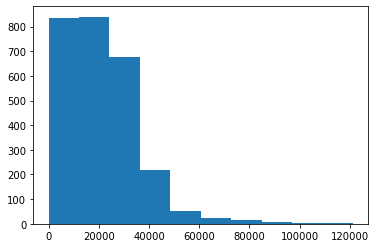

In [148]:
# histogram of labor
_ = plt.hist(labor)

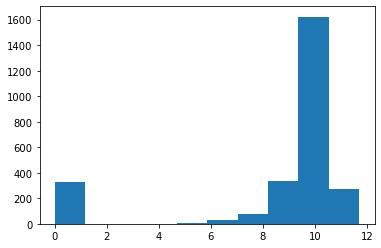

In [149]:
# histogram of log labor
_ = plt.hist(np.log(1 + labor))

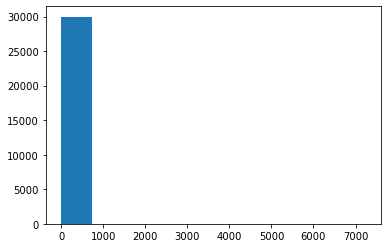

In [150]:
# histogram of citations
_ = plt.hist(citation)

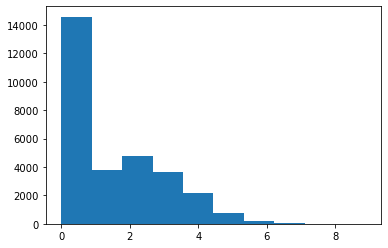

In [151]:
# histogram of log citations
_ = plt.hist(np.log(1 + citation))

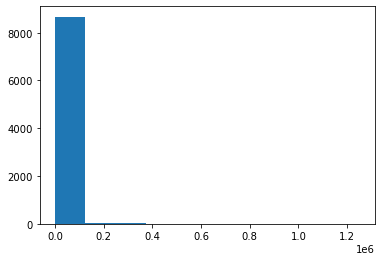

In [152]:
# histogram of lunar impacts
_ = plt.hist(lunar)

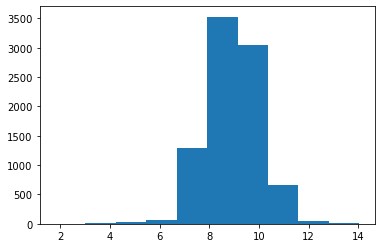

In [153]:
# histogram of log lunar impacts
_ = plt.hist(np.log(1 + lunar))

#### 3.
I think that the plot of log lunar impacts is the most equal distribution, and the log labor descriebs the most unequal distribution.

#### 4.

In [154]:
# labor income mean and st. dev.
print("Labor income")
labor_mean = labor.mean()
print("mean: " + str(labor_mean))
labor_dev = labor.std()
print("st. dev.: " + str(labor_dev))
print()
print("Citations")
# citations mean and st. dev.
citation_mean = citation.mean()
print("mean: " + str(citation_mean))
citation_dev = citation.std()
print("st. dev.: " + str(citation_dev))
print()
# lunar impacts mean and st. dev.
print("lunar impact")
lunar_mean = lunar.mean()
print("mean: " + str(lunar_mean))
lunar_dev = lunar.std()
print("st. dev.: " + str(lunar_dev))

Labor income
mean: 20502.37607865417
st. dev.: 15632.519774212507

Citations
mean: 15.605633333333333
st. dev.: 79.17810312200979

lunar impact
mean: 13711.492083524552
st. dev.: 27505.543842011248


In [155]:
print("difference between labor income standard deviation and mean is " + str(labor_dev - labor_mean))
print("difference between citations standard deviation and mean is " + str(citation_dev - citation_mean))
print("difference between lunar impacts standard deviation and mean is " + str(lunar_dev - lunar_mean))

difference between labor income standard deviation and mean is -4869.856304441664
difference between citations standard deviation and mean is 63.57246978867646
difference between lunar impacts standard deviation and mean is 13794.051758486696


### 2.2 80/20 ratio
#### 1.

In [156]:
# 20/80 for labor income
sum_labor = labor.sum() # sum of all values
for i in range(50,100): # ranegs through percentiles 1%-50%
    thresh = np.percentile(labor, i) # gets the percentile, creates a threshold
    top_10 = labor[labor > thresh].sum() # sums all numbers above said threshold
    print(top_10/sum_labor)

0.7874667345018619
0.7780778195447816
0.754008237352208
0.754008237352208
0.7478476220239216
0.7364133457782637
0.7077318850928278
0.7077318850928278
0.7044649229746641
0.6910971192983331
0.6817293771778195
0.6562952173380101
0.6562952173380101
0.6474562618876845
0.6348069361388086
0.6146525983440627
0.6109614264475861
0.5945154949319581
0.5854627215473541
0.5520159668251451
0.5520159668251451
0.546643124333105
0.53325046828316
0.5011327065476253
0.5011327065476253
0.4885844641361235
0.47792561841438674
0.4466703215644543
0.4466703215644543
0.43455303535697143
0.4051300914324231
0.4045630762321407
0.36575691169847957
0.36575691169847957
0.35612645099746965
0.33138848217662814
0.32379382471999313
0.2972825414921274
0.2576907228645633
0.2576907228645633
0.25289949702606335
0.22964975142542204
0.20932050980921302
0.18985211211307856
0.1742882429380495
0.1457688605718023
0.12400107313224637
0.10343366627839386
0.07508822500042818
0.04234557467220405


In [157]:
# 20/80 for citations
sum_citation = citation.sum() # sum of all values
for i in range(50,100): # ranegs through percentiles 1%-50%
    thresh = np.percentile(citation, i) # gets the percentile, creates a threshold
    top_10 = citation[citation > thresh].sum() # sums all numbers above said threshold
    print(top_10/sum_citation)

0.9881623943490492
0.9881623943490492
0.9881623943490492
0.9881623943490492
0.9804408237196397
0.9804408237196397
0.9804408237196397
0.9804408237196397
0.9718627247852806
0.9718627247852806
0.9718627247852806
0.9718627247852806
0.9627527666291446
0.9627527666291446
0.9627527666291446
0.95358940895275
0.95358940895275
0.9439604074596993
0.9439604074596993
0.9347842338984427
0.9347842338984427
0.9259797209981866
0.9169018025542058
0.9169018025542058
0.9072450333106208
0.8973255384273627
0.8973255384273627
0.8878289677445538
0.8783195811768827
0.869156223500488
0.8602705433294388
0.8417750854926319
0.8325220166222027
0.8221411498839094
0.8041391036142931
0.7967208422599531
0.7814464434851517
0.7583757147525787
0.7425096492933108
0.7200946666695146
0.6979701774359259
0.6788211094711525
0.6505556754078121
0.6229203556835246
0.5902227614387112
0.5512859672468703
0.5054755868073281
0.4550237200668989
0.38508102843204056
0.2923047019345578


In [158]:
# 20/80 for lunar impacts
sum_lunar = lunar.sum() # sum of all values
for i in range(50,100): # ranegs through percentiles 1%-50%
    thresh = np.percentile(lunar, i) # gets the percentile, creates a threshold
    top_10 = lunar[lunar > thresh].sum() # sums all numbers above said threshold
    print(top_10/sum_lunar)

0.8582467574821437
0.8525199259488995
0.8467029341173389
0.8406413589428745
0.8343334432410381
0.8278035784057592
0.8214007747426321
0.8146466178612864
0.8077143159450307
0.8004179421420238
0.7930963820283038
0.7852183383285486
0.7778295031523261
0.7699443470392466
0.761570526293065
0.7533391211642703
0.7445993039959672
0.7356076655582598
0.726583519207888
0.7169696282797586
0.7073570343211179
0.6974321217420911
0.6869764976158982
0.6764477411456415
0.6653152662973316
0.6537183508589474
0.6421713059892837
0.6302466338098274
0.6177548930998001
0.6048715931174097
0.5910661896663915
0.5775344886151809
0.56295161471237
0.5480219060656878
0.532675033458675
0.5165213621543383
0.49968925029431793
0.4818848296951456
0.4633907560298726
0.44362661453351376
0.42338188308506197
0.40182290316746305
0.379033768608845
0.3549000113924126
0.3288514251581874
0.3006899919516768
0.2695911320422462
0.23522834382058677
0.19606647562724477
0.14708182074266732


#### 2.
The labor income distribution is the most unequal, I'd say. This is because the population at which 80% of the wealth is owned is 18%, compared to 30% and 37% for citations and lunar impacts.

## 3. Global temperature over time

#### 1. 
Yes, these variables are of a measure that allows us to ask/answer such questions, as temperature is an interval variable, meaning that the difference between 2 values is meaningful.

#### 2.

In [159]:
temps = pd.read_csv("../Data/UAH-lower-troposphere-wide.csv.bz2", sep = "\t")
temps.dropna()
temps.head(5)

,year,month,globe,globe_land,globe_ocean,nh,nh_land,nh_ocean,sh,sh_land,...,soext_ocean,nopol,nopol_land,nopol_ocean,sopol,sopol_land,sopol_ocean,usa48,usa49,aust
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.45,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29
1,1979,1,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.29,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92
2,1979,2,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-0.36,-2.00,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30
3,1979,3,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.21,-0.56,-0.47,-0.65,-0.53,-1.25,-0.18,-0.70,-0.38,0.23
4,1979,4,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.31,-0.84,-0.81,-0.87,-0.26,0.26,-0.51,-0.72,-0.46,-1.12


#### 3.

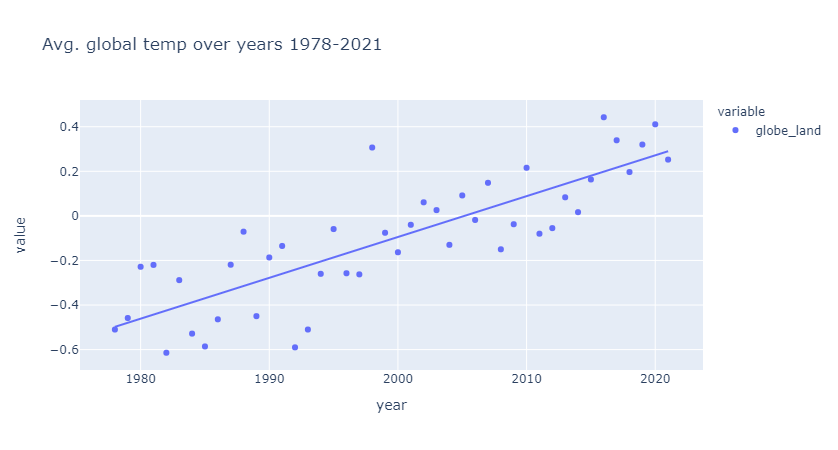

In [160]:
# takes the avg. temp of each year on the globe and plots it
px.scatter(temps.groupby('year').mean()['globe_land'], 
           trendline = "ols", title = "Avg. global temp over years 1978-2021")
# it seems that there is an upward trend in global land temperature since the year 1978, possibly indicating 
# signs of global warming.

#### 4.

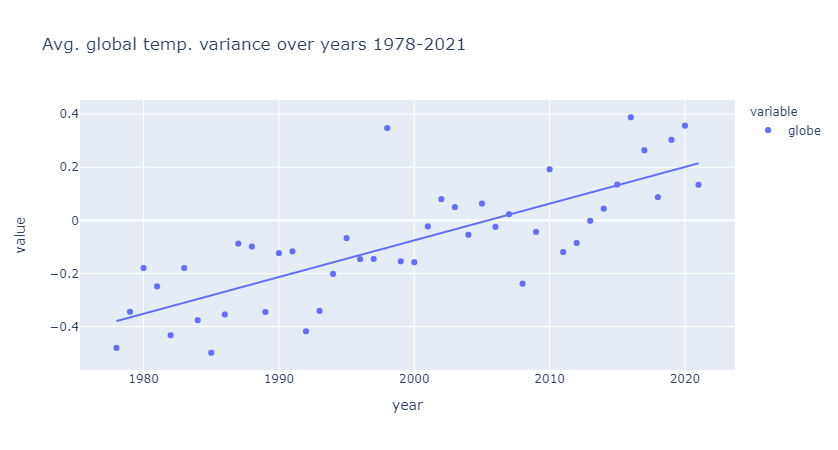

In [161]:
# plots the yearly temp variance around the globe
px.scatter(temps.groupby('year').mean()['globe'], 
           trendline = "ols", title = "Avg. global temp. variance over years 1978-2021")

#### 5.

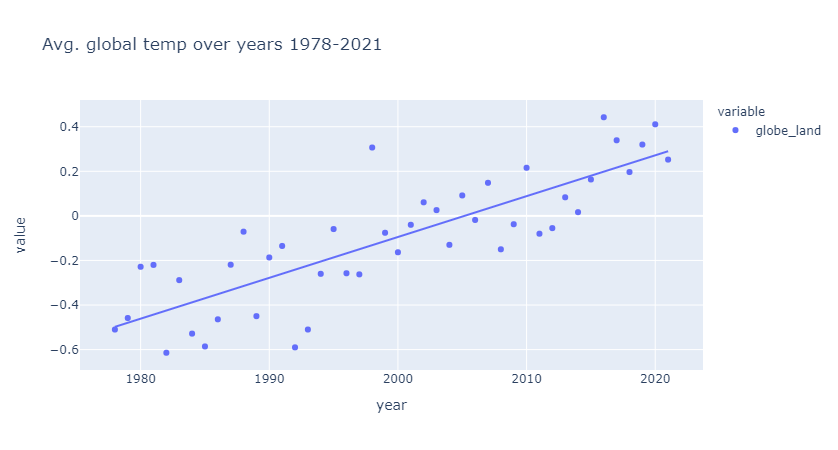

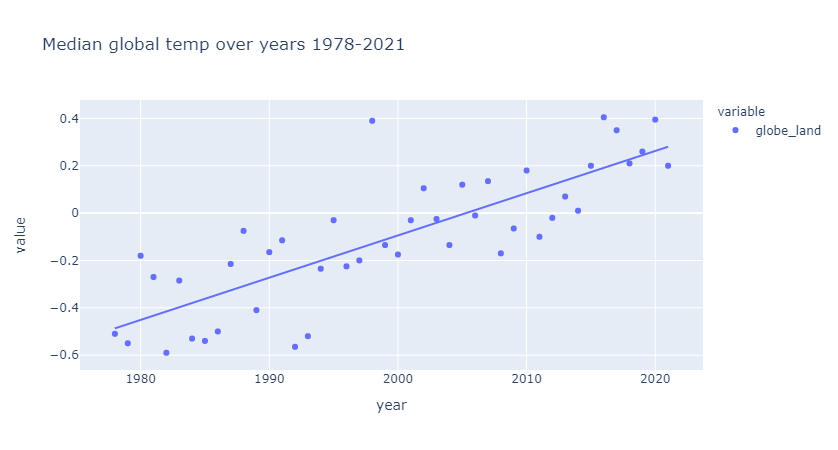

In [162]:
# takes the avg. temp of each year on the globe and plots it
mean_temps = px.scatter(temps.groupby('year').mean()['globe_land'], 
           trendline = "ols", title = "Avg. global temp over years 1978-2021")

# takes the median temp of each year on the globe and plots it
median_temps = px.scatter(temps.groupby('year').median()['globe_land'], 
           trendline = "ols", title = "Median global temp over years 1978-2021")
mean_temps.show()
median_temps.show()

I think that the median might be the best value to anaylze here. Because the median is less susceptible to outliers and describes typical values, I personally like to use the median.

#### 6.

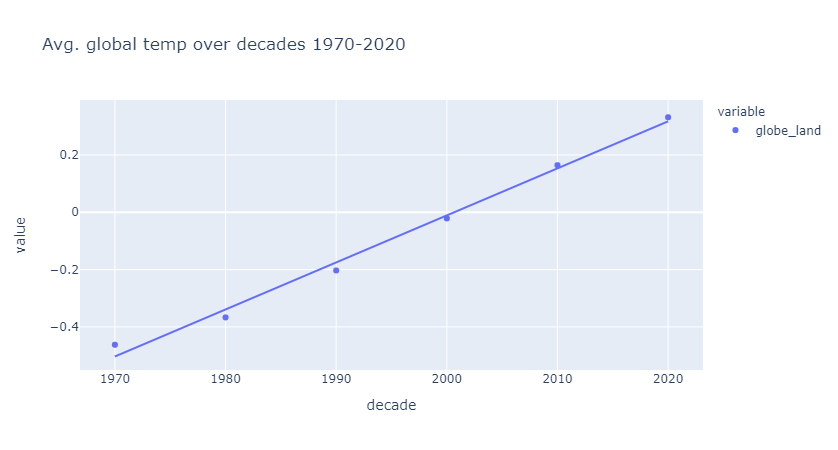

In [175]:
decade = (temps['year']//10)*10 # adds a column that goes by decades instead of annually
temps['decade'] = decade
px.scatter(temps.groupby('decade').mean()['globe_land'], 
           trendline = "ols", title = "Avg. global temp over decades 1970-2020")

#### 7.
There are less values/observations for years in the 1970's and obviously the 2020's, so this could mean that the data quality is less than optimal.

#### 8.
I do see a positive trend in overall global temperature, and also an upward trend in temperature variablilty. I believe that the both the varibility and temperature plots point towards the implication of climate change/global warming, because as the specification states, "Global warming is thought to bring both higher temperatures but also more extreme weather." Not only is the global temperature rising, but the variance of temperature is getting more extreme, which could point to more extreme weather. More data will be needed to prove causation, though.   

### I spent around 6 hours on this problemset.